# Concrete Strength Prediction by Using A Deep Neural Network 

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/fra

## Importing the Dataset

In [2]:
data = pd.read_csv('concrete_data.csv')

## Exploring the Dataset

In [3]:
print("Count of row and column:", data.shape)

Count of row and column: (1030, 9)


In [4]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Correlation of the features:

Text(0.5, 1.0, 'Feature Correlation')

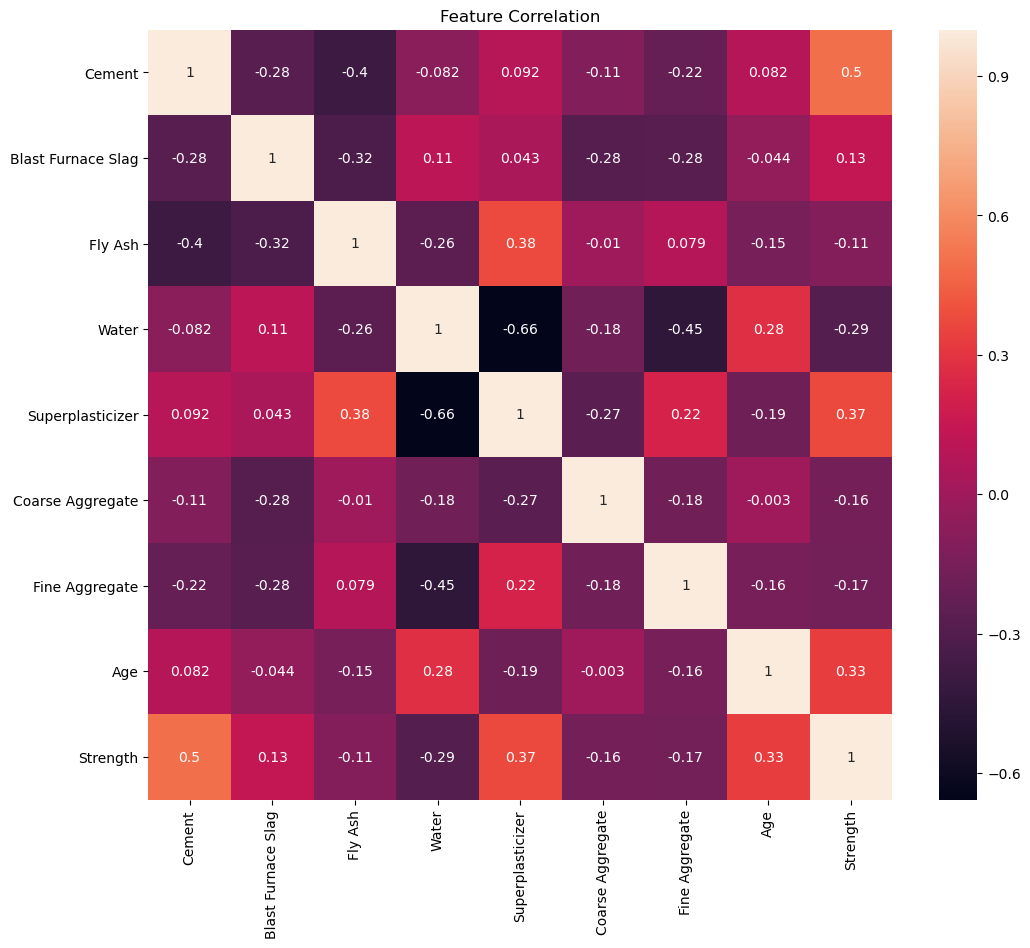

In [5]:
plt.figure(figsize = (12, 10))
corr = data.corr()
sns.heatmap(corr,annot=True).set_title(f'Feature Correlation')

In [6]:
corr.Strength

Cement                0.497832
Blast Furnace Slag    0.134829
Fly Ash              -0.105755
Water                -0.289633
Superplasticizer      0.366079
Coarse Aggregate     -0.164935
Fine Aggregate       -0.167241
Age                   0.328873
Strength              1.000000
Name: Strength, dtype: float64

#### Correlations between features and Strength is low

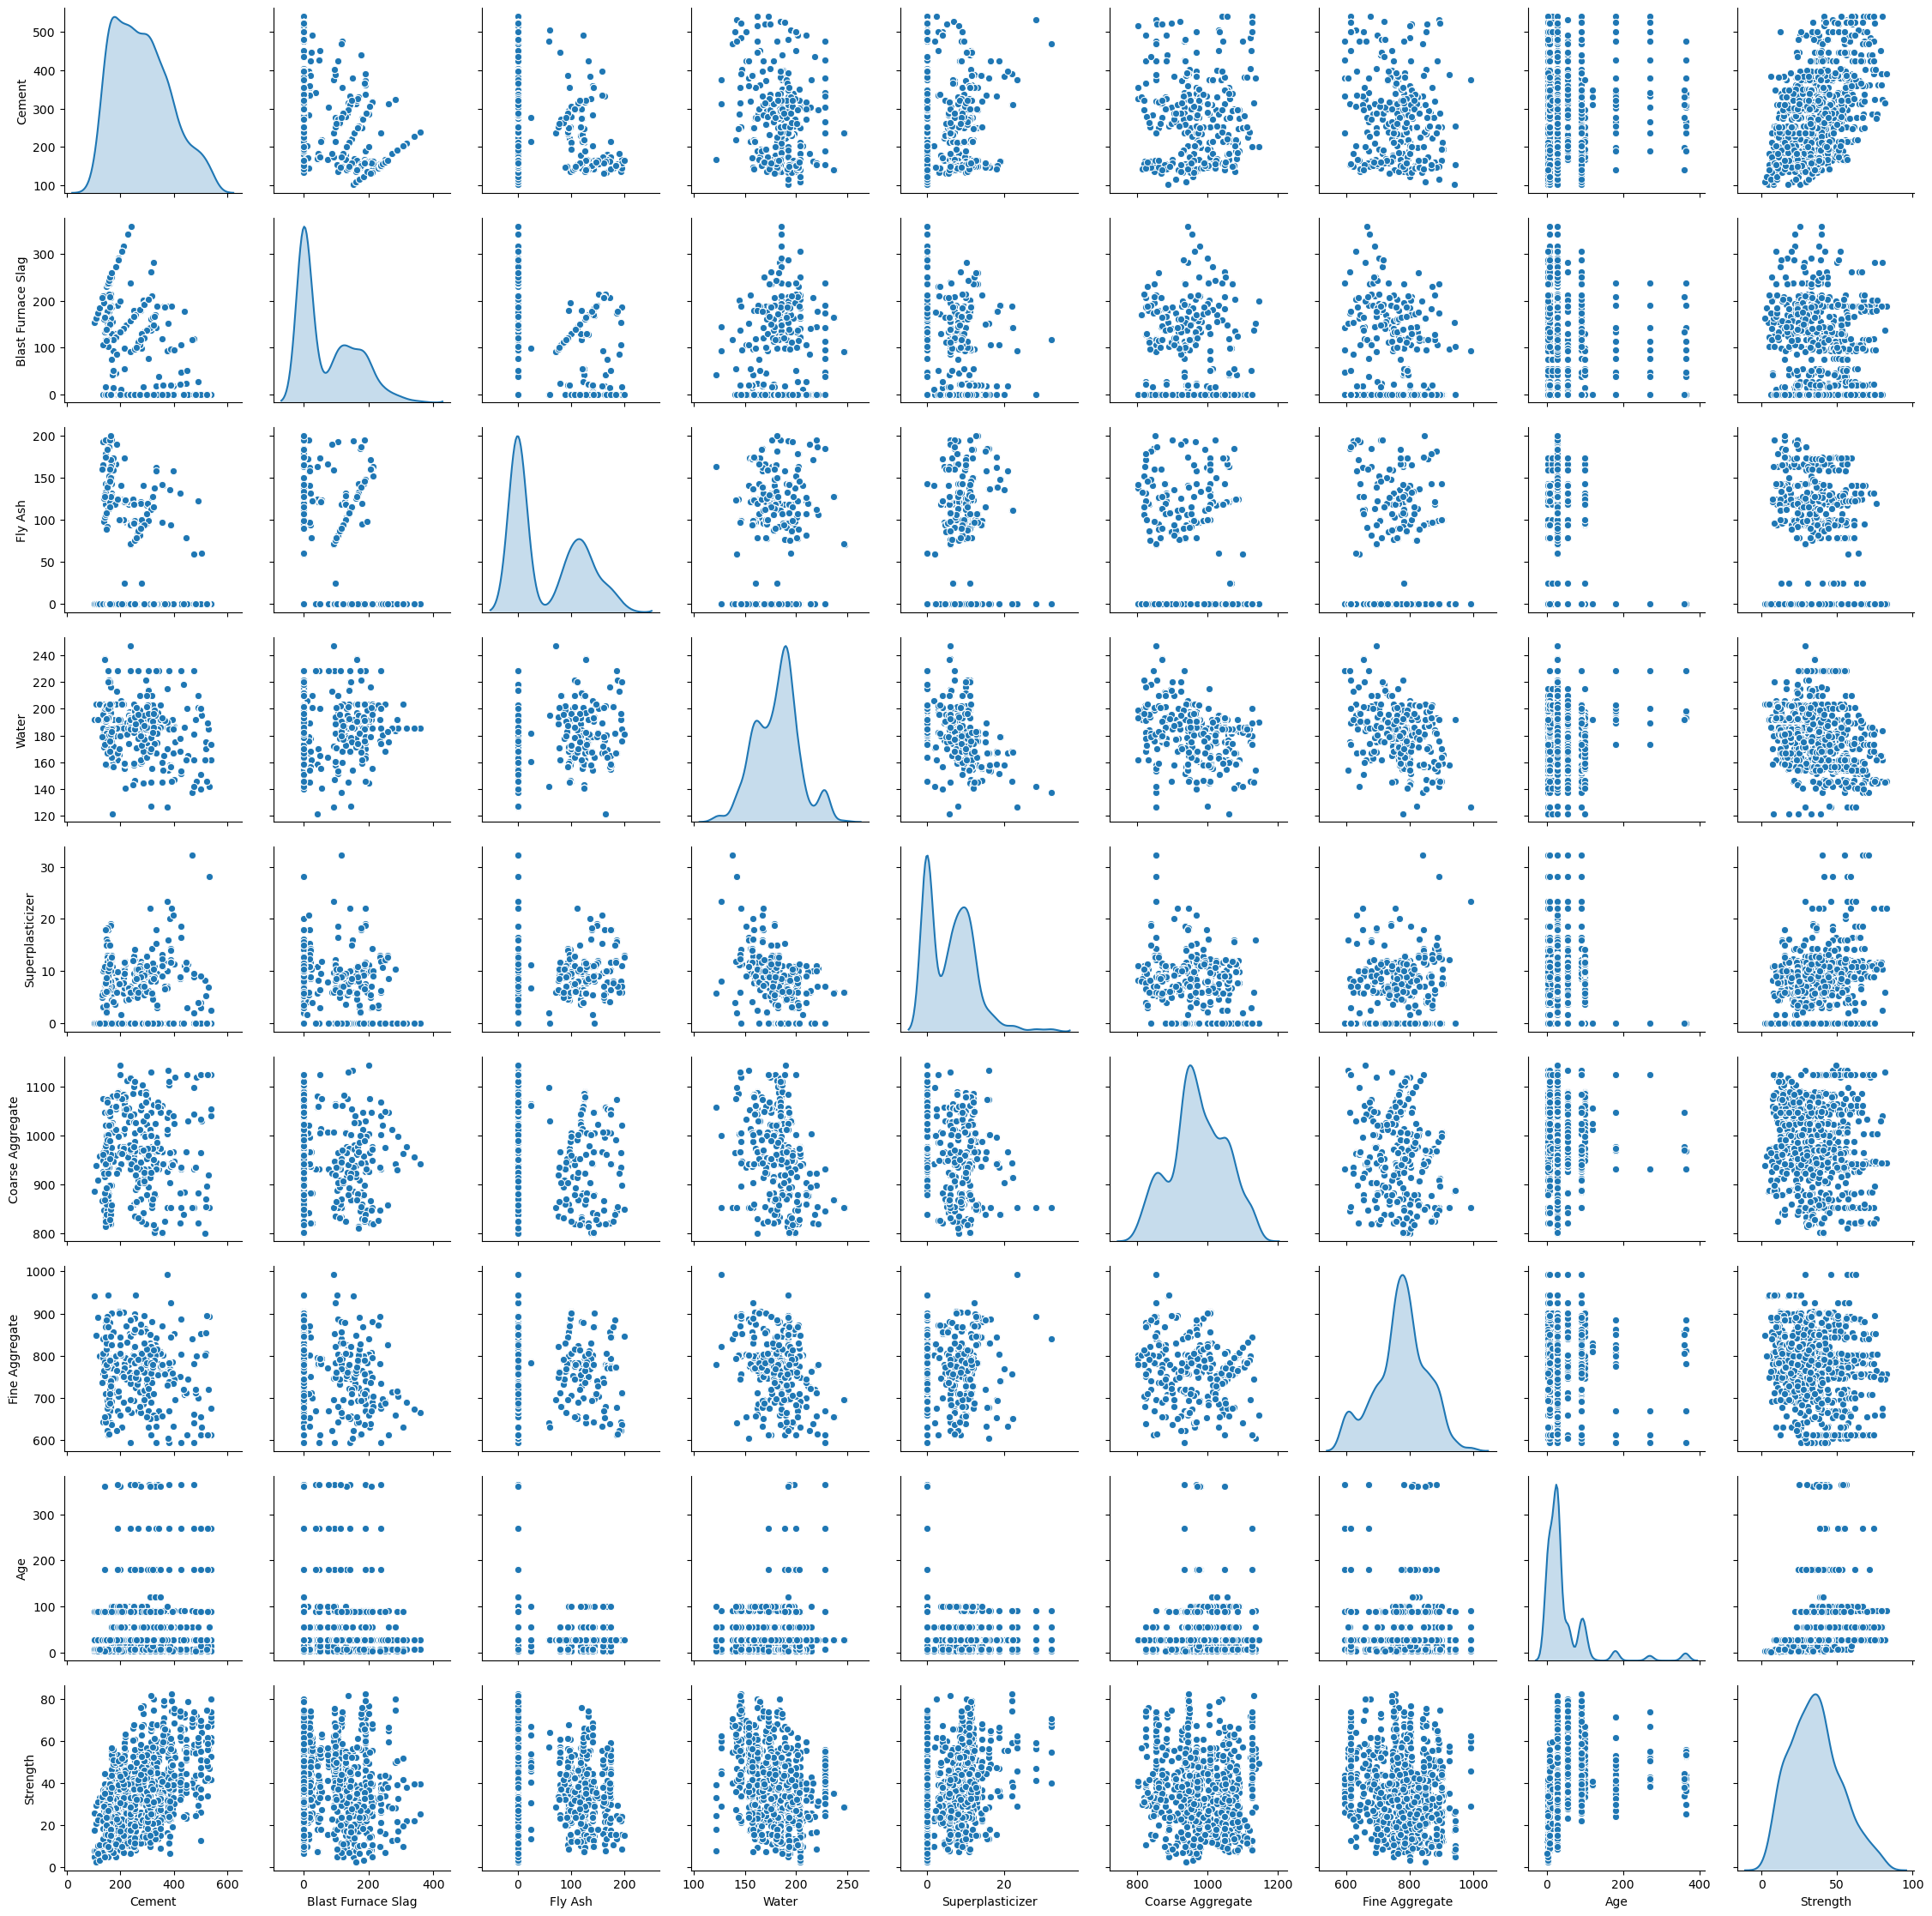

In [7]:
sns.pairplot(data,palette="husl",diag_kind="kde")

In [8]:
from scipy.stats import zscore 
zscored_data = np.abs(zscore(data))
new_zscored_data = (zscored_data < 3).all(axis=1)
data = data[new_zscored_data]

In [9]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### The data is clear, there is no missing data and it is ready to be utilized in the construction of model.

### Handling Outliers

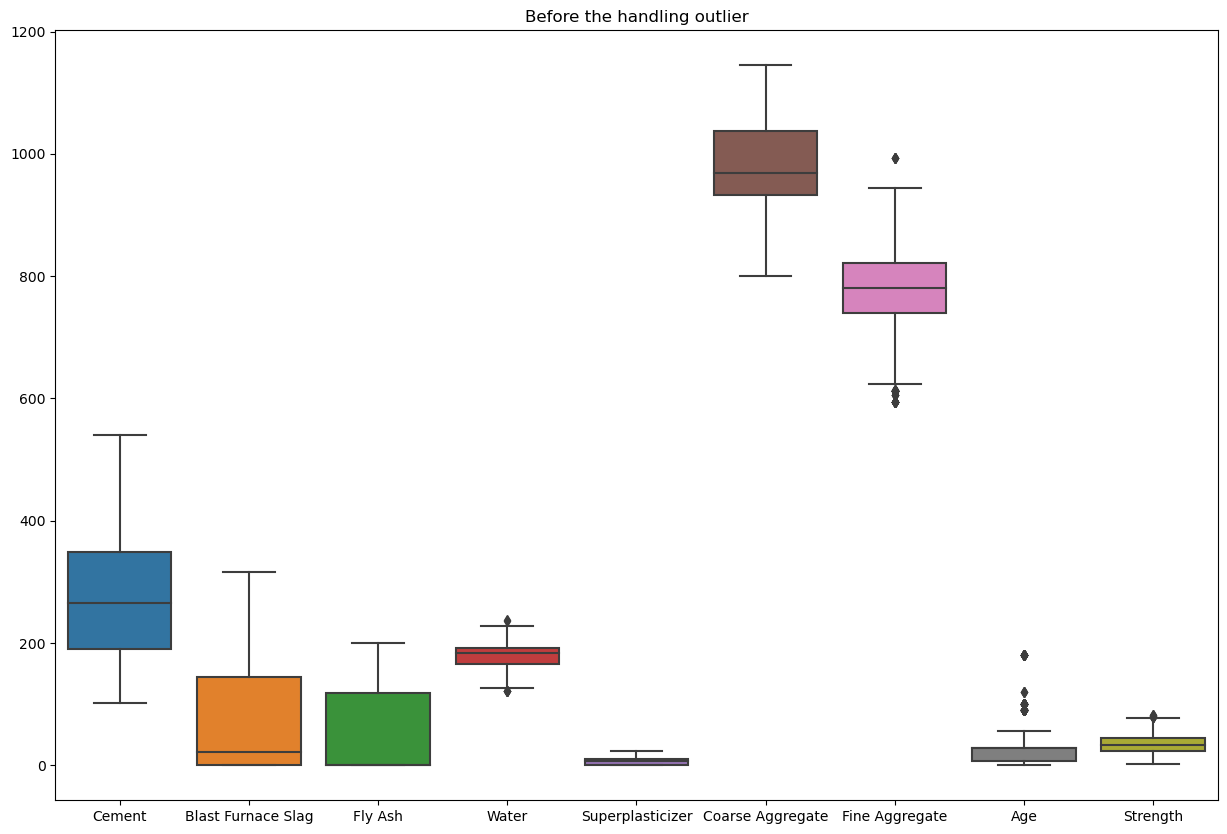

In [10]:
plt.figure(figsize = (15,10))
box = sns.boxplot(data=data).set_title(f'Before the handling outlier')

In [11]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,277.489399,73.106218,56.749745,180.760041,6.194495,974.729256,776.003976,36.448522,35.294220
std,102.594951,85.197793,64.439192,20.139643,5.486470,77.765000,77.651828,36.871075,16.733154
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.300000,0.000000,0.000000,164.900000,0.000000,932.000000,739.000000,7.000000,23.220000
50%,266.000000,22.000000,0.000000,184.000000,6.700000,968.000000,780.000000,28.000000,33.690000
75%,349.000000,144.200000,118.300000,192.000000,10.300000,1038.000000,822.200000,28.000000,45.300000
max,540.000000,316.100000,200.100000,237.000000,23.400000,1145.000000,992.600000,180.000000,82.600000


## Seperating the Data

In [13]:
X = data.drop(['Strength'], axis=1)
y = data['Strength']

- Strength is seperated as target to build regression model since it is supervised learning 

- The predictors in this data of concrete strength are Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, and age

## Building the Model

In [14]:
def build_model(input_shape, hidden_layers=1, nodes_per_layer=10):
    model = Sequential()
    for _ in range(hidden_layers):
        model.add(Dense(nodes_per_layer, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(1)) 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

- In build_model function, I have used Keras libraty to build a neural network. There is a hidden layer of 10 nodes, and a ReLU activation function, and I have used the adam optimizer and the mean squared error  as the loss function as a default. Later on, with the help of this method by giving specific parameters into it, hidden layer number can change.


In [15]:
def normalize_data(data):
    norm = (data - data.mean()) / data.std()
    return norm

In [16]:
def fit_and_predict(model, X_train, X_test, y_train, y_test, epochs):
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

### Part A - Baseline Model

In [17]:
mse_results_of_part_A = []
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # holding 30% of the data for testing
    model = build_model(input_shape=X_train.shape[1])
    mse = fit_and_predict(model, X_train, X_test, y_train, y_test, epochs=50)
    mse_results_of_part_A.append(mse)

print("Part A -> Mean MSE:", np.mean(mse_results_of_part_A))
print("Part A -> Standard Deviation of MSE:", np.std(mse_results_of_part_A))

2024-05-20 22:24:29.683244: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-05-20 22:24:29.695728: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394330000 Hz
2024-05-20 22:24:29.696439: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55880cc3f210 executing computations on platform Host. Devices:
2024-05-20 22:24:29.696494: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-05-20 22:24:29.777320: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

Part A -> Mean MSE: 336.14396221949573
Part A -> Standard Deviation of MSE: 524.7203777073842


### Part B - By Normalizing the Data

In [18]:
norm_data = normalize_data(data)
mse_results_of_part_B = []
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(norm_data.iloc[:, :-1], norm_data.iloc[:, -1], test_size=0.3)
    model = build_model(input_shape=X_train.shape[1])
    mse = fit_and_predict(model, X_train, X_test, y_train, y_test, epochs=50)
    mse_results_of_part_B.append(mse)

print("Part B -> Mean MSE:", np.mean(mse_results_of_part_B))
print("Part B -> Standard Deviation of MSE:", np.std(mse_results_of_part_B))

Part B -> Mean MSE: 0.22039469689776583
Part B -> Standard Deviation of MSE: 0.044366518392834044


- I have repeated Part A but using a normalized version of the data.

### Part C - Increase the Number of Epochs

In [19]:
mse_results_of_part_C = []
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(norm_data.iloc[:, :-1], norm_data.iloc[:, -1], test_size=0.3)
    model = build_model(input_shape=X_train.shape[1])
    mse = fit_and_predict(model, X_train, X_test, y_train, y_test, epochs=100)
    mse_results_of_part_C.append(mse)

print("Part C -> Mean MSE:", np.mean(mse_results_of_part_C))
print("Part C -> Standard Deviation of MSE:", np.std(mse_results_of_part_C))

Part C -> Mean MSE: 0.16863467861688458
Part C -> Standard Deviation of MSE: 0.021472594083584522


- I have repeated Part B but using 100 epochs this time for training

### Part D - Increase the Number of Hidden Layers

In [20]:
mse_results_of_part_D = []
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(norm_data.iloc[:, :-1], norm_data.iloc[:, -1], test_size=0.3)
    model = build_model(input_shape=X_train.shape[1], hidden_layers=3)
    mse = fit_and_predict(model, X_train, X_test, y_train, y_test, epochs=50)
    mse_results_of_part_D.append(mse)

print("Part D - Mean MSE:", np.mean(mse_results_of_part_D))
print("Part D - Standard Deviation of MSE:", np.std(mse_results_of_part_D))

Part D - Mean MSE: 0.17584267091313127
Part D - Standard Deviation of MSE: 0.023184838610105753


- I have repeated part B but using a neural network with three hidden layers, each of 10 nodes and ReLU activation function.

## Visualization

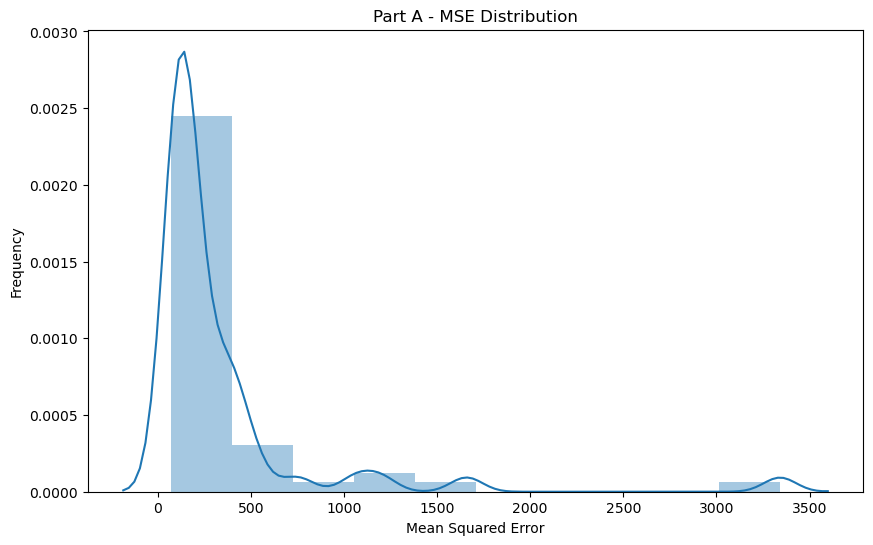

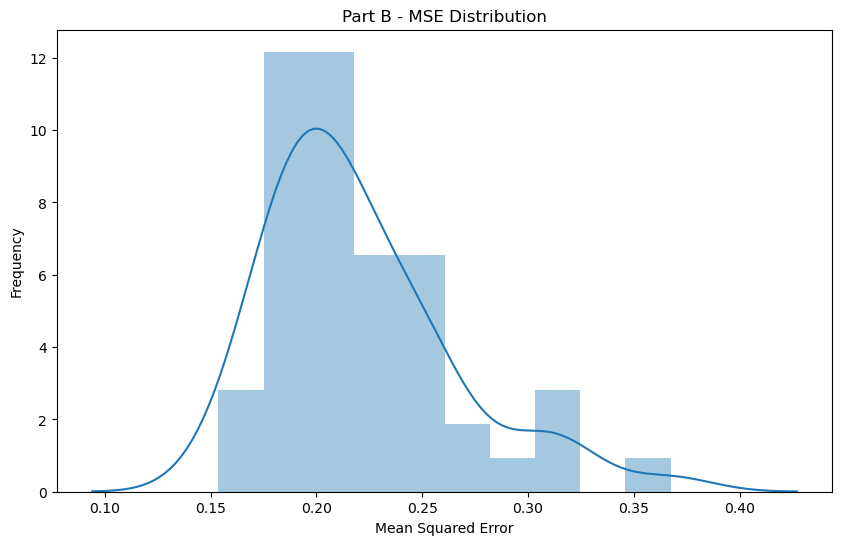

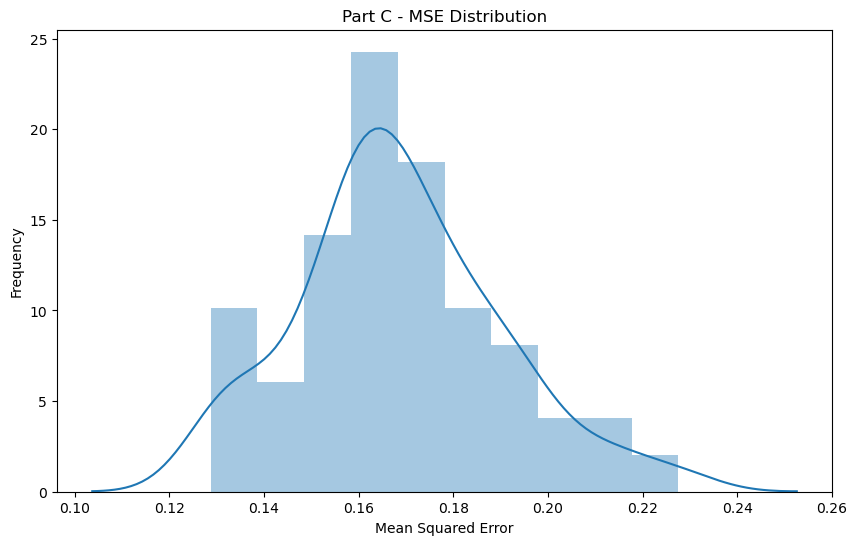

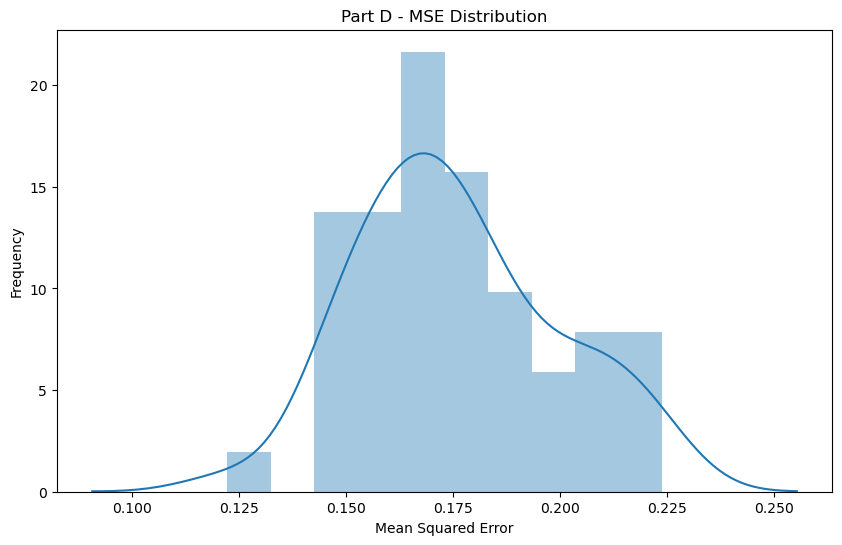

In [26]:
# I made an method to create visualizations of the results
def create_visuals(results, title):
    plt.figure(figsize=(10, 6))
    sns.distplot(results, kde=True, bins=10)
    plt.title(title)
    plt.xlabel("Mean Squared Error")
    plt.ylabel("Frequency")
    plt.show()

# Individual Visualizations
create_visuals(mse_results_of_part_A, "Part A - MSE Distribution")
create_visuals(mse_results_of_part_B, "Part B - MSE Distribution")
create_visuals(mse_results_of_part_C, "Part C - MSE Distribution")
create_visuals(mse_results_of_part_D, "Part D - MSE Distribution")

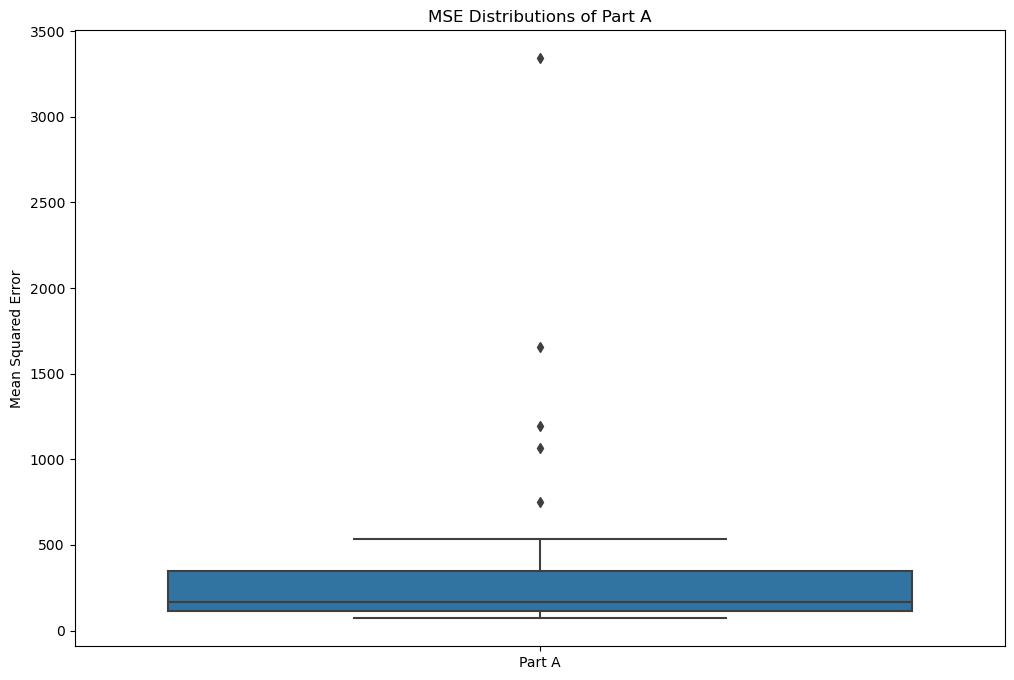

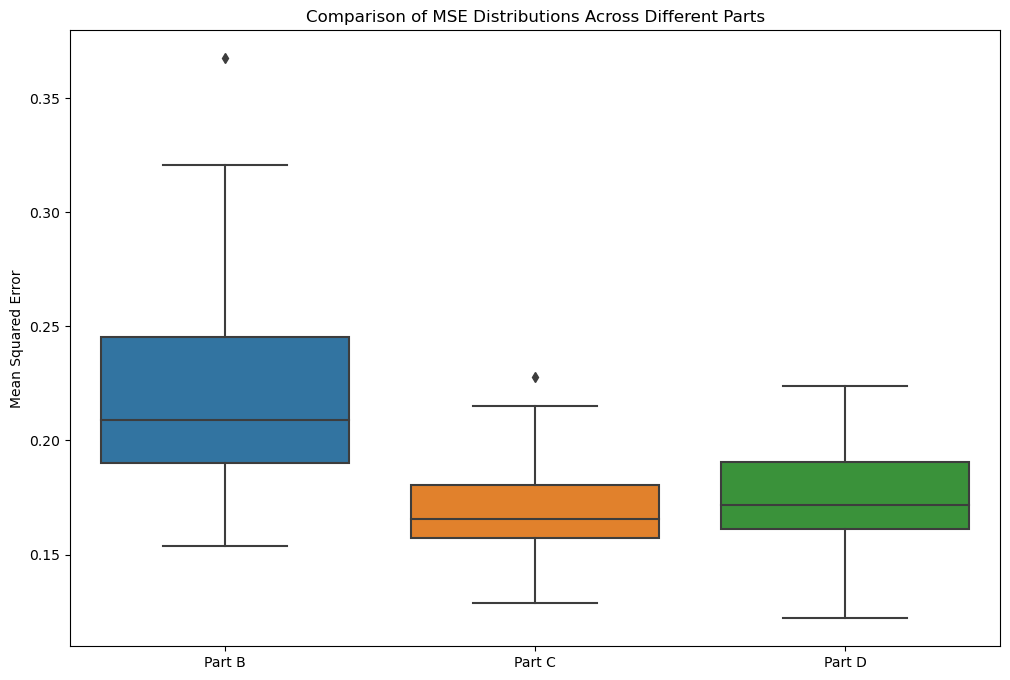

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=[mse_results_of_part_A])
plt.xticks([0], ["Part A"])
plt.title("MSE Distributions of Part A")
plt.ylabel("Mean Squared Error")
plt.show()

# Comparison Visualization except part A
plt.figure(figsize=(12, 8))
sns.boxplot(data=[mse_results_of_part_B, mse_results_of_part_C, mse_results_of_part_D])
plt.xticks([0, 1, 2], ["Part B", "Part C", "Part D"])
plt.title("Comparison of MSE Distributions Across Different Parts")
plt.ylabel("Mean Squared Error")
plt.show()

## Observations and Discussions

- For the Part A, it has a long tail extending towards higher MSE values. And the majority of MSE values are concentrated near 0, indicating that the model performs well on average. There are a few outliers with very high MSE values, poor performance. The distribution is skewed to the right.

- For the Part B, it is more tightly clustered compared to Part A, with a peak around 0.2. The distribution is more symmetric and narrower, it means that is more consistent model performance with fewer extreme outliers. This suggests that normalization of data may have led to a more stable model performance. It is more consistent but with higher mean MSE compared to Part A.

- For the Part C, it is similar to Part B but shifted slightly to lower MSE values. The peak is around 0.16, indicating an improvement in model performance compared to Part B. Increasing the epochs for training seems to have contributed to a better model performance.

- For the Part D, the MSE distribution for Part D shows a similar pattern to Part C but with a tighter spread. Andd the peak is around 0.17, slightly higher than Part C, but with a very narrow spread. It is consistent model performance with minimal variability. Adding more hidden layers while keeping epochs constant has resulted in stable performance.

**Performance Improvement:**

- With normalization and increasing epochs: Moving from Part B to Part C shows a noticeable improvement in terms of lower median MSE and tighter spread. This suggests that normalization of data and increasing the training epochs significantly improved the model's consistency and performance.

- With additional hidden layers: From Part C to Part D, the performance remains consistent with a slightly higher median MSE but without outliers, suggesting that adding more hidden layers resulted in a very stable model without significant degradation in performance.